# Quick start `klifs_utils` - work with KLIFS data

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [3]:
import klifs_utils as klifs

## Remote data

### Kinases

In [4]:
klifs.remote.kinases.kinase_groups()

['AGC', 'CAMK', 'CK1', 'CMGC', 'Other', 'STE', 'TK', 'TKL']

In [5]:
klifs.remote.kinases.kinase_families(kinase_group='CMGC')

['CDK', 'CDKL', 'CK2', 'CLK', 'DYRK', 'GSK', 'MAPK', 'RCK', 'SRPK']

In [6]:
# Or get all kinase families
klifs.remote.kinases.kinase_families()[:2]

['A6', 'ABC1']

In [7]:
len(klifs.remote.kinases.kinase_families())

144

In [8]:
print(len(klifs.remote.kinases.kinase_names()))
klifs.remote.kinases.kinase_names().head()

1127


,kinase_ID,name,full_name,species
0,813,4921509C19Rik,RIKEN cDNA 4921509C19 gene,Mouse
1,815,4921509C19Rik,RIKEN cDNA 4921509C19 gene,Mouse
2,814,4921509C19Rik,RIKEN cDNA 4921509C19 gene,Mouse
3,531,Aak1,AP2 associated kinase 1,Mouse
4,277,AAK1,AP2 associated kinase 1,Human


In [9]:
klifs.remote.kinases.kinases_from_kinase_names(kinase_names='Aak1')

,kinase_ID,name,HGNC,family,group,kinase_class,species,full_name,uniprot,iuphar,pocket
0,531,AAK1,Aak1,NAK,Other,,Mouse,AP2 associated kinase 1,Q3UHJ0,0,EVLAEGGFALVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...
1,277,AAK1,AAK1,NAK,Other,BIKE,Human,AP2 associated kinase 1,Q2M2I8,1921,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...


In [10]:
klifs.remote.kinases.kinases_from_kinase_names(kinase_names=['Aak1', 'EGFR'])

,kinase_ID,name,HGNC,family,group,kinase_class,species,full_name,uniprot,iuphar,pocket
0,531,AAK1,Aak1,NAK,Other,,Mouse,AP2 associated kinase 1,Q3UHJ0,0,EVLAEGGFALVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...
1,277,AAK1,AAK1,NAK,Other,BIKE,Human,AP2 associated kinase 1,Q2M2I8,1921,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...
0,406,EGFR,EGFR,EGFR,TK,,Human,epidermal growth factor receptor,P00533,1797,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...
1,663,EGFR,Egfr,EGFR,TK,,Mouse,epidermal growth factor receptor,Q01279,0,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...


In [11]:
klifs.remote.kinases.kinases_from_kinase_ids(kinase_ids=533)

,kinase_ID,name,HGNC,family,group,kinase_class,species,full_name,uniprot,iuphar,pocket
0,533,ACK,Tnk2,Ack,TK,,Mouse,"tyrosine kinase, non-receptor, 2",O54967,0,EKLGDGSFGVVRRVAVKCLDFIREVNAMHSLDRNLIRLYGVKMVTE...


In [12]:
klifs.remote.kinases.kinases_from_kinase_ids(kinase_ids=[533, 531])

,kinase_ID,name,HGNC,family,group,kinase_class,species,full_name,uniprot,iuphar,pocket
0,533,ACK,Tnk2,Ack,TK,,Mouse,"tyrosine kinase, non-receptor, 2",O54967,0,EKLGDGSFGVVRRVAVKCLDFIREVNAMHSLDRNLIRLYGVKMVTE...
0,531,AAK1,Aak1,NAK,Other,,Mouse,AP2 associated kinase 1,Q3UHJ0,0,EVLAEGGFALVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...


### Ligands

In [13]:
klifs.remote.ligands.ligands_from_kinase_ids(kinase_ids=[33, 40])

,kinase_id,ligand_ID,PDB-code,Name,SMILES,InChIKey
0,33,920,LW4,3-(1H-indol-3-yl)-4-[2-(4-methylpiperazin-1-yl...,O=C1NC(=O)C(=C1c2nc(nc3c2cccc3)N4CCN(CC4)C)C=5...,OAVGBZOFDPFGPJ-UHFFFAOYSA-N
1,33,921,3KZ,"(1R)-9-[(3S,4S)-1,3-dimethylpiperidin-4-yl]-8-...",Fc1c(c2c(cc3N4C(=NNC(=O)[C@H]4C)COc3c2)[C@@H]5...,BLWOBXIQFDYTRF-OAGGEKHMSA-N
0,40,26,ADP,ADENOSINE-5&apos;-DIPHOSPHATE,P(=O)(OP(=O)(O)O)(OC[C@H]1O[C@@H](N2c3ncnc(N)c...,XTWYTFMLZFPYCI-KQYNXXCUSA-N
1,40,63,ATP,ADENOSINE-5&apos;-TRIPHOSPHATE,P(=O)(OP(=O)(OC[C@H]1O[C@@H](N2c3ncnc(N)c3N=C2...,ZKHQWZAMYRWXGA-KQYNXXCUSA-N
2,40,64,ANP,PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER,P(=O)(OP(=O)(O)NP(=O)(O)O)(OC[C@H]1O[C@@H](N2c...,PVKSNHVPLWYQGJ-KQYNXXCUSA-N
3,40,160,ACP,PHOSPHOMETHYLPHOSPHONIC ACID ADENYLATE ESTER,P(=O)(OP(=O)(O)CP(=O)(O)O)(OC[C@H]1O[C@@H](N2c...,UFZTZBNSLXELAL-IOSLPCCCSA-N
4,40,677,BI1,3-{1-[3-(DIMETHYLAMINO)PROPYL]-1H-INDOL-3-YL}-...,O=C1NC(=O)C(C=2c3c(NC2)cccc3)=C1C=4c5c(N(C4)CC...,QMGUOJYZJKLOLH-UHFFFAOYSA-N
5,40,1028,C58,"(2S)-3-phenyl-N~1~-[2-(pyridin-4-yl)-5,6,7,8-t...",S1c2nc(nc(NC[C@@H](N)Cc3ccccc3)c2C4=C1CCCC4)c5...,NRHASZRDWOUMFD-SFHVURJKSA-N
6,40,3444,AFU,2-amino-5-[3-(piperazin-1-yl)phenyl]-N-(pyridi...,c1cc(cc(c1)N2CCNCC2)c3cc(c(nc3)N)C(=O)Nc4ccncc4,YDMJAALVMGFGRY-UHFFFAOYSA-N


In [14]:
klifs.remote.ligands.structures_from_ligand_ids(ligand_ids=[101, 920]).columns

Index(['ligand_id', 'structure_ID', 'kinase', 'species', 'kinase_ID', 'pdb',
       'alt', 'chain', 'rmsd1', 'rmsd2', 'pocket', 'resolution',
       'quality_score', 'missing_residues', 'missing_atoms', 'ligand',
       'allosteric_ligand', 'DFG', 'aC_helix', 'Grich_distance', 'Grich_angle',
       'Grich_rotation', 'front', 'gate', 'back', 'fp_I', 'fp_II', 'bp_I_A',
       'bp_I_B', 'bp_II_in', 'bp_II_A_in', 'bp_II_B_in', 'bp_II_out',
       'bp_II_B', 'bp_III', 'bp_IV', 'bp_V'],
      dtype='object')

### Interactions

#### Interaction types

In [15]:
klifs.remote.interactions.interaction_types()

,position,name
0,1,Apolar contact
1,2,Aromatic face-to-face
2,3,Aromatic edge-to-face
3,4,Hydrogen bond donor (protein)
4,5,Hydrogen bond acceptor (protein)
5,6,Protein cation - ligand anion
6,7,Protein anion - ligand cation


#### Interaction fingerprints by structure IDs

In [16]:
klifs.remote.interactions.interaction_fingerprint_from_structure_ids(structure_ids=[33, 34, 35])

,structure_ID,IFP
0,33,0000000000000010000001000000000000000000000000...
1,34,0000000000000010000000000000000000000000000000...
2,35,0000000000000010000001000000000000000000000000...


#### KLIFS pocket numbering

In [17]:
klifs.remote.interactions.klifs_pocket_numbering_from_structure_id(structure_id=33)

,index,Xray_position,KLIFS_position
0,1,367,I.1
1,2,368,I.2
2,3,369,I.3
3,4,370,g.l.4
4,5,371,g.l.5
...,...,...,...
80,81,500,xDFG.81
81,82,_,xDFG.82
82,83,_,xDFG.83
83,84,_,a.l.84


### Structures

#### ... by KLIFS structure ID(s)

In [18]:
klifs.remote.structures.structures_from_structure_ids(structure_ids=33).columns

Index(['structure_ID', 'kinase', 'species', 'kinase_ID', 'pdb', 'alt', 'chain',
       'rmsd1', 'rmsd2', 'pocket', 'resolution', 'quality_score',
       'missing_residues', 'missing_atoms', 'ligand', 'allosteric_ligand',
       'DFG', 'aC_helix', 'Grich_distance', 'Grich_angle', 'Grich_rotation',
       'front', 'gate', 'back', 'fp_I', 'fp_II', 'bp_I_A', 'bp_I_B',
       'bp_II_in', 'bp_II_A_in', 'bp_II_B_in', 'bp_II_out', 'bp_II_B',
       'bp_III', 'bp_IV', 'bp_V'],
      dtype='object')

In [19]:
klifs.remote.structures.structures_from_structure_ids(structure_ids=33)

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,33,ITK,Human,474,1snu,,B,0.746,2.124,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,...,False,False,False,False,False,False,False,False,False,False


In [20]:
klifs.remote.structures.structures_from_structure_ids(structure_ids=[33, 34])

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,33,ITK,Human,474,1snu,,B,0.746,2.124,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,...,False,False,False,False,False,False,False,False,False,False
1,34,ITK,Human,474,4mf1,B,A,0.845,2.053,QEIGSG__GLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,...,False,False,False,False,False,False,False,False,False,False


#### ... by KLIFS kinase ID(s)

In [21]:
klifs.remote.structures.structures_from_kinase_ids(kinase_ids=22)

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,7085,MASTL,Human,22,5loh,B,A,0.827,1.960,KPIS____GKVYLYAVKVV________LALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
1,7086,MASTL,Human,22,5loh,A,A,0.827,1.960,KPIS____GKVYLYAVKVV________LALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
2,7087,MASTL,Human,22,5loh,B,B,0.820,2.175,KPISRGAFGKVYLYAVKVV_________ALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
3,7088,MASTL,Human,22,5loh,A,B,0.820,2.175,KPISRGAFGKVYLYAVKVV_________ALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False


In [22]:
klifs.remote.structures.structures_from_kinase_ids(kinase_ids=[22, 23])

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,7085,MASTL,Human,22,5loh,B,A,0.827,1.960,KPIS____GKVYLYAVKVV________LALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
1,7086,MASTL,Human,22,5loh,A,A,0.827,1.960,KPIS____GKVYLYAVKVV________LALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
2,7087,MASTL,Human,22,5loh,B,B,0.820,2.175,KPISRGAFGKVYLYAVKVV_________ALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
3,7088,MASTL,Human,22,5loh,A,B,0.820,2.175,KPISRGAFGKVYLYAVKVV_________ALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False


#### ... by PDB ID

In [23]:
klifs.remote.structures.structures_from_pdb_ids(pdb_ids='3w32')

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,784,EGFR,Human,406,3w32,,A,0.83,2.177,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...,...,True,True,True,True,False,False,False,False,False,False


In [24]:
klifs.remote.structures.structures_from_pdb_ids(pdb_ids=['3w32', '3poz'])

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,7308,EGFR,Human,406,3poz,,A,0.815,2.155,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...,...,True,True,True,True,False,False,False,False,False,False
1,784,EGFR,Human,406,3w32,,A,0.830,2.177,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...,...,True,True,True,True,False,False,False,False,False,False


### Coordinates

Load or download structural data from mol2 files.

#### Complex

In [25]:
klifs.remote.coordinates.complex.mol2_to_dataframe(33).head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,14.4725,33.9701,39.3798,N.4,1,ILE358,1.0,BACKBONE
1,2,H1,15.2804,34.1248,39.9658,H,1,ILE358,0.0,BACKBONE
2,3,H2,14.4008,34.7151,38.7016,H,1,ILE358,0.0,BACKBONE
3,4,H3,14.5688,33.0864,38.9002,H,1,ILE358,0.0,BACKBONE
4,5,CA,13.2420,33.9462,40.2248,C.3,1,ILE358,0.0,BACKBONE


In [26]:
klifs.remote.coordinates.complex.pdb_to_dataframe(33).keys()

Structural data keys: dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])


dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])

#### Protein

In [27]:
klifs.remote.coordinates.protein.mol2_to_dataframe(33).head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,14.4725,33.9701,39.3798,N.4,1,ILE358,1.0,BACKBONE
1,2,H1,15.2804,34.1248,39.9658,H,1,ILE358,0.0,BACKBONE
2,3,H2,14.4008,34.7151,38.7016,H,1,ILE358,0.0,BACKBONE
3,4,H3,14.5688,33.0864,38.9002,H,1,ILE358,0.0,BACKBONE
4,5,CA,13.2420,33.9462,40.2248,C.3,1,ILE358,0.0,BACKBONE


#### Pocket

In [28]:
klifs.remote.coordinates.pocket.mol2_to_dataframe(33).head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,7.2217,16.5654,51.5923,N.3,1,GLN367,0.0,BACKBONE
1,2,H,6.9393,17.3722,51.0544,H,1,GLN367,0.0,BACKBONE
2,3,CA,6.8224,15.2285,51.1651,C.3,1,GLN367,0.0,BACKBONE
3,4,HA,7.6298,14.5853,51.5151,H,1,GLN367,0.0,BACKBONE
4,5,C,6.7483,14.9679,49.6640,C.2,1,GLN367,0.0,BACKBONE


#### Ligand

In [29]:
klifs.remote.coordinates.ligand.mol2_to_dataframe(33).head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
0,1,O4,1.9656,14.5986,41.0878,O.3,1,STU,-0.5600
1,2,C25,0.8220,14.3912,41.8995,C.3,1,STU,0.4556
2,3,H25,0.9939,13.7705,42.7788,H,1,STU,0.0800
3,4,C24,-0.2090,13.5993,41.0666,C.3,1,STU,-0.1600
4,5,H241,-1.1472,14.1541,41.0753,H,1,STU,0.0800


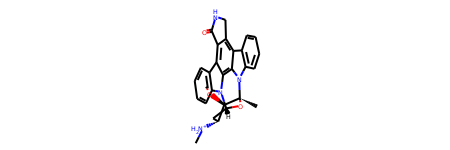

In [30]:
klifs.remote.coordinates.ligand.mol2_to_rdkit_mol(33, compute2d=False)

## Local data

Get your personal copy of the KLIFS dataset here: https://klifs.vu-compmedchem.nl/search.php. 

Set the path to the `KLIFS_download` folder:

In [31]:
PATH_TO_KLIFS_DOWNLOAD = Path('/home/dominique/Documents/Work/Data/KLIFS_download')

### Initialize

In [32]:
# Add test files and update paths
klifs_overview_path = PATH_TO_KLIFS_DOWNLOAD / 'overview.csv'
klifs_export_path = PATH_TO_KLIFS_DOWNLOAD / 'KLIFS_export.csv'

In [33]:
klifs.local.initialize.from_files(
    klifs_overview_path=klifs_overview_path,
    klifs_export_path=klifs_export_path
).head()

,species,kinase,pdb_id,alternate_model,chain,ligand_orthosteric_pdb_id,ligand_allosteric_pdb_id,rmsd1,rmsd2,qualityscore,...,bp_iv,bp_v,kinase_all,family,group,ligand_orthosteric_name,ligand_allosteric_name,dfg,ac_helix,filepath
0,Human,ITK,3v8t,B,A,477,-,0.842,2.047,7.8,...,0.0,0.0,[ITK],Tec,TK,"3-{2-[5-(difluoromethyl)-2H-thieno[3,2-c]pyraz...",-,in,out-like,HUMAN/ITK/3v8t_altB_chainA
1,Human,ITK,4kio,A,D,G6K,-,0.842,2.151,8.6,...,0.0,0.0,[ITK],Tec,TK,"1-[(3S)-3-{[4-(morpholin-4-ylmethyl)-6-([1,3]t...",-,in,out-like,HUMAN/ITK/4kio_altA_chainD
2,Human,ITK,4kio,B,C,G5K,-,0.840,2.148,9.0,...,0.0,0.0,[ITK],Tec,TK,"1-[(3S)-3-{[4-(morpholin-4-ylmethyl)-6-([1,3]t...",-,in,out-like,HUMAN/ITK/4kio_altB_chainC
3,Human,ITK,3miy,-,B,B49,-,0.845,2.052,6.4,...,0.0,0.0,[ITK],Tec,TK,N-[2-(diethylamino)ethyl]-5-[(Z)-(5-fluoro-2-o...,-,in,out-like,HUMAN/ITK/3miy_chainB
4,Human,ITK,4m0y,A,A,M0Y,M0Y,0.817,2.200,8.0,...,0.0,0.0,[ITK],Tec,TK,4-(carbamoylamino)-1-(naphthalen-1-yl)-1H-pyra...,4-(carbamoylamino)-1-(naphthalen-1-yl)-1H-pyra...,in,out,HUMAN/ITK/4m0y_altA_chainA


In [34]:
klifs_metadata_path = Path(klifs_overview_path).parent / 'klifs_metadata.csv'
klifs_metadata = pd.read_csv(klifs_metadata_path)

### Kinases

In [35]:
klifs.local.kinases.kinase_groups(klifs_metadata)

['TK', 'CMGC', 'CAMK', 'AGC', 'STE', 'Other', 'CK1', 'TKL', 'Atypical']

In [36]:
klifs.local.kinases.kinase_families(klifs_metadata, kinase_group='TK')

['Tec',
 'Abl',
 'Sev',
 'FAK',
 'Axl',
 'Eph',
 'PDGFR',
 'JakA',
 'FGFR',
 'InsR',
 'EGFR',
 'Src',
 'Syk',
 'JakB',
 'Met',
 'Fer',
 'Csk',
 'Ret',
 'Ack',
 'Trk',
 'VEGFR',
 'ALK',
 'Tie']

In [37]:
klifs.local.kinases.kinase_families(klifs_metadata)[:2]

['Tec', 'CLK']

In [38]:
len(klifs.local.kinases.kinase_families(klifs_metadata))

88

In [39]:
klifs.local.kinases.kinase_names(klifs_metadata).head()

,kinase,species
0,ITK,Human
71,CLK1,Human
75,ABL2,Human
81,SRPK1,Human
82,AMPKa1,Human


In [40]:
klifs_metadata.head()

,species,kinase,pdb_id,alternate_model,chain,ligand_orthosteric_pdb_id,ligand_allosteric_pdb_id,rmsd1,rmsd2,qualityscore,...,bp_iv,bp_v,kinase_all,family,group,ligand_orthosteric_name,ligand_allosteric_name,dfg,ac_helix,filepath
0,Human,ITK,3v8t,B,A,477,-,0.842,2.047,7.8,...,0.0,0.0,['ITK'],Tec,TK,"3-{2-[5-(difluoromethyl)-2H-thieno[3,2-c]pyraz...",-,in,out-like,HUMAN/ITK/3v8t_altB_chainA
1,Human,ITK,4kio,A,D,G6K,-,0.842,2.151,8.6,...,0.0,0.0,['ITK'],Tec,TK,"1-[(3S)-3-{[4-(morpholin-4-ylmethyl)-6-([1,3]t...",-,in,out-like,HUMAN/ITK/4kio_altA_chainD
2,Human,ITK,4kio,B,C,G5K,-,0.840,2.148,9.0,...,0.0,0.0,['ITK'],Tec,TK,"1-[(3S)-3-{[4-(morpholin-4-ylmethyl)-6-([1,3]t...",-,in,out-like,HUMAN/ITK/4kio_altB_chainC
3,Human,ITK,3miy,-,B,B49,-,0.845,2.052,6.4,...,0.0,0.0,['ITK'],Tec,TK,N-[2-(diethylamino)ethyl]-5-[(Z)-(5-fluoro-2-o...,-,in,out-like,HUMAN/ITK/3miy_chainB
4,Human,ITK,4m0y,A,A,M0Y,M0Y,0.817,2.200,8.0,...,0.0,0.0,['ITK'],Tec,TK,4-(carbamoylamino)-1-(naphthalen-1-yl)-1H-pyra...,4-(carbamoylamino)-1-(naphthalen-1-yl)-1H-pyra...,in,out,HUMAN/ITK/4m0y_altA_chainA


In [41]:
klifs.local.kinases.kinases_from_kinase_names(klifs_metadata, kinase_names=['Aak1', 'EGFR'])

In [42]:
klifs.local.kinases.kinases_from_kinase_ids(klifs_metadata, kinase_ids=[533, 531])

### Ligands

### Interactions

### Structures

### Coordinates

In [43]:
species = 'human'
kinase_name = 'EGFR'
pdb_id = '3w2s'
alt = 'A'
chain = 'A'

#### Complex

In [44]:
klifs.local.coordinates.complex.mol2_to_dataframe(
    PATH_TO_KLIFS_DOWNLOAD, 
    species, 
    kinase_name, 
    pdb_id, 
    alt, 
    chain
).head(2)

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,10.6228,40.3289,40.5367,N.4,1,GLN701,1.0,BACKBONE
1,2,H1,10.5817,39.3599,40.8186,H,1,GLN701,0.0,BACKBONE


#### Protein

In [45]:
klifs.local.coordinates.protein.mol2_to_dataframe(
    PATH_TO_KLIFS_DOWNLOAD, 
    species, 
    kinase_name, 
    pdb_id, 
    alt, 
    chain
).head(2)

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,10.6228,40.3289,40.5367,N.4,1,GLN701,1.0,BACKBONE
1,2,H1,10.5817,39.3599,40.8186,H,1,GLN701,0.0,BACKBONE


#### Pocket

In [46]:
klifs.local.coordinates.pocket.mol2_to_dataframe(
    PATH_TO_KLIFS_DOWNLOAD, 
    species, 
    kinase_name, 
    pdb_id, 
    alt, 
    chain
).head(2)

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,7.2649,16.4890,52.6698,N.3,1,LYS716,0.0,BACKBONE
1,2,H,6.9388,17.1451,51.9746,H,1,LYS716,0.0,BACKBONE


#### Water

In [47]:
klifs.local.coordinates.water.mol2_to_dataframe(
    PATH_TO_KLIFS_DOWNLOAD, 
    species, 
    kinase_name, 
    pdb_id, 
    alt, 
    chain
).head(2)

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
0,1,O,-5.9516,9.5791,34.0857,O.3,1,HOH,0.0
1,2,H1,-4.9916,9.5791,34.0857,H,1,HOH,0.0


#### Ligand

In [48]:
klifs.local.coordinates.ligand.mol2_to_dataframe(
    PATH_TO_KLIFS_DOWNLOAD, 
    species, 
    kinase_name,
    pdb_id, 
    alt, 
    chain
).head(2)

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
0,1,C1,2.7164,23.0489,35.3421,C.ar,1,W2R,-0.15
1,2,H1,1.9779,23.8106,35.1399,H,1,W2R,0.15


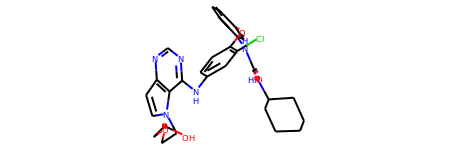

In [49]:
klifs.local.coordinates.ligand.mol2_to_rdkit_mol(
    PATH_TO_KLIFS_DOWNLOAD, 
    species, 
    kinase_name, 
    pdb_id, 
    alt, 
    chain,
    compute2d=False
)